21. SVM Accuracy on Iris dataset:, 1.0
22.1. SVM Linear Accuracy:, 1.0
22.2. SVM RBF Accuracy:, 0.8055555555555556
23. SVR MSE:, 1.3320115421348744


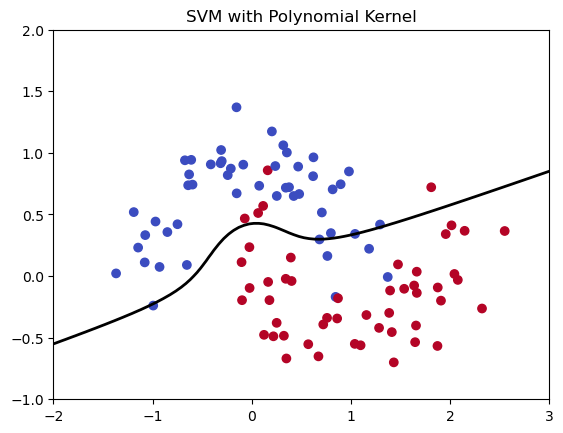

25. Gaussian Naïve Bayes Accuracy:, 0.9736842105263158
26. Multinomial Naïve Bayes Accuracy:, 0.9476372924648787


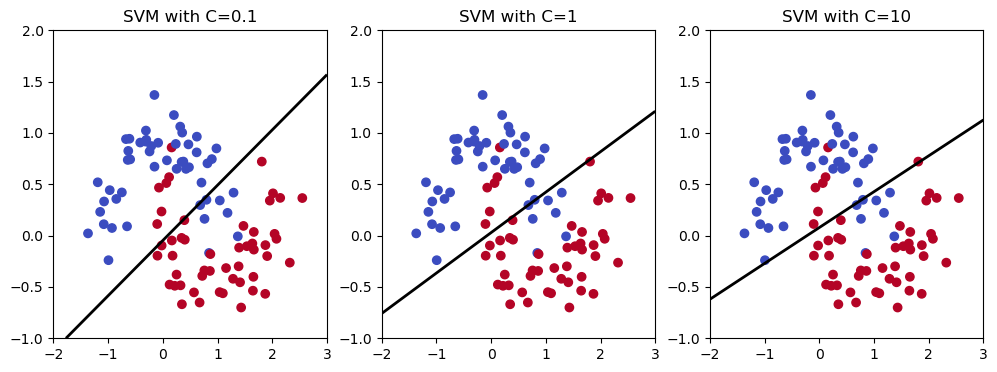

28. Bernoulli Naïve Bayes Accuracy:, 0.805
29.1. SVM Accuracy without Scaling:, 0.88
29.2. SVM Accuracy with Scaling:, 0.875
30.1. Accuracy without Smoothing:, 0.86
30.2. Accuracy with Smoothing:, 0.85
31.1. Best Parameters:, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
31.2. Best Accuracy:, 0.8750293336337097
32.1. SVM Accuracy without Class Weighting:, 0.905
32.2. SVM Accuracy with Class Weighting:, 0.88
33. Predictions for test emails:, [0 0]
SVM Accuracy: 0.9444444444444444
Naïve Bayes Accuracy: 0.9722222222222222
Accuracy without Feature Selection: 0.9722222222222222
Accuracy with Feature Selection: 0.9166666666666666
36.1. SVM OvR Accuracy:, 1.0
36.2. SVM OvO Accuracy:, 1.0
37.1. SVM Linear Accuracy:, 1.0
37.2. SVM Polynomial Accuracy:, 0.9444444444444444
37.3. SVM RBF Accuracy:, 1.0
39.1. Accuracy with Equal Priors:, 0.815
39.2. Accuracy with Skewed Priors:, 0.805
40.1. SVM Accuracy without RFE:, 0.83
40.2. SVM Accuracy with RFE:, 0.84
41.1. Precision:, 0.8737864077669902
41.2. Recall:

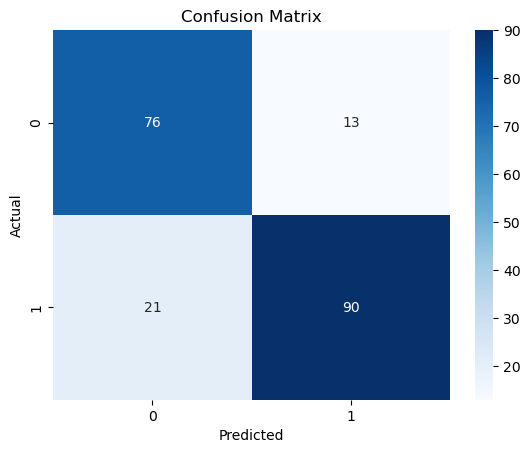

44. Mean Absolute Error (MAE):, 0.17567405453443413
45. ROC-AUC Score:, 0.8873367749772244


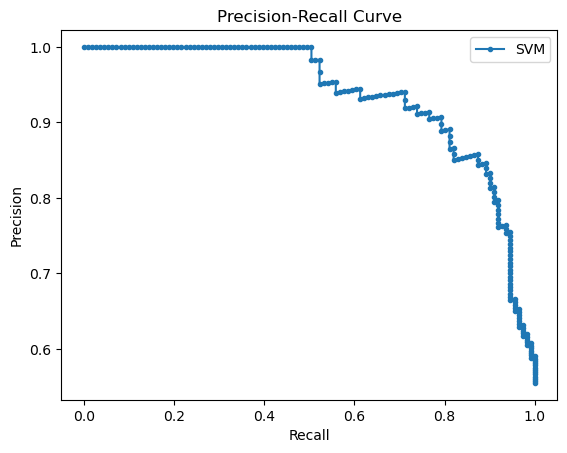

In [63]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_20newsgroups
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Q1: What is a Support Vector Machine (SVM)?
"""
SVM is a supervised learning algorithm used for classification and regression. It finds the optimal hyperplane that best separates different classes in a dataset.
"""

# Q2: What is the difference between Hard Margin and Soft Margin SVM?
"""
- **Hard Margin SVM**: Used when data is linearly separable without misclassification.
- **Soft Margin SVM**: Allows some misclassification for better generalization when data is not perfectly separable.
"""

# Q3: What is the mathematical intuition behind SVM?
"""
SVM aims to maximize the margin between classes by solving the optimization problem:
    \[ \min \frac{1}{2} ||w||^2 \]
Subject to: 
    \[ y_i (w \cdot x_i + b) \geq 1 \]
for all training samples.
"""

# Q4: What is the role of Lagrange Multipliers in SVM?
"""
Lagrange multipliers help convert the constrained optimization problem into a dual problem, making it easier to solve using quadratic programming.
"""

# Q5: What are Support Vectors in SVM?
"""
Support vectors are the data points closest to the decision boundary. They define the margin and influence the hyperplane's position.
"""

# Q6: What is a Support Vector Classifier (SVC)?
"""
SVC is the classification version of SVM that finds the best hyperplane to separate data points into different classes.
"""

# Q7: What is a Support Vector Regressor (SVR)?
"""
SVR applies SVM principles to regression problems by fitting a hyperplane within a specified error margin.
"""

# Q8: What is the Kernel Trick in SVM?
"""
The Kernel Trick transforms non-linearly separable data into a higher-dimensional space where it becomes linearly separable using a kernel function.
"""

# Q9: Compare Linear Kernel, Polynomial Kernel, and RBF Kernel
"""
- **Linear Kernel**: Best for linearly separable data.
- **Polynomial Kernel**: Captures complex relationships using polynomial functions.
- **RBF Kernel**: Most commonly used; maps data into a higher dimension to handle non-linearity effectively.
"""

# Q10: What is the effect of the C parameter in SVM?
"""
The C parameter controls the trade-off between maximizing the margin and minimizing classification errors. A higher C gives less margin but fewer misclassifications, while a lower C allows more misclassifications but gives a larger margin.
"""

# Q11: What is the role of the Gamma parameter in RBF Kernel SVM?
"""
Gamma defines the influence of a single training example. A high gamma means each point has a small influence, capturing more complex patterns, while a low gamma means broader influence, leading to smoother decision boundaries.
"""

# Q12: What is the Naïve Bayes classifier, and why is it called "Naïve"?
"""
Naïve Bayes is a probabilistic classifier based on Bayes theorem. It is called "Naïve" because it assumes that all features are independent, which is rarely true in real-world data.
"""

# Q13: What is Bayes Theorem?
"""
Bayes Theorem calculates conditional probability:
    \[ P(A|B) = \frac{P(B|A) P(A)}{P(B)} \]
where P(A|B) is the probability of A given B, P(B|A) is the likelihood, P(A) is the prior, and P(B) is the evidence.
"""

# Q14: Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes
"""
- **Gaussian Naïve Bayes**: Used for continuous data, assumes normal distribution.
- **Multinomial Naïve Bayes**: Used for text classification (word counts), works well with frequency-based features.
- **Bernoulli Naïve Bayes**: Used for binary features (e.g., presence/absence of words).
"""

# Q15: When to use Gaussian Naïve Bayes
"""
Use Gaussian NB when dealing with continuous numerical data, especially when features are normally distributed.
"""

# Q16: Key assumptions made by Naïve Bayes
"""
- Features are independent (Naïve assumption).
- All features contribute equally to the classification.
- Data follows a specific distribution (Gaussian, Multinomial, or Bernoulli).
"""

# Q17: Advantages and disadvantages of Naïve Bayes
"""
**Advantages**:
- Simple, fast, and scalable.
- Works well with small datasets and high-dimensional data.
- Effective for text classification and spam detection.

**Disadvantages**:
- Strong independence assumption is often unrealistic.
- Struggles with highly correlated features.
"""

# Q18: Why Naïve Bayes is good for text classification
"""
- Efficient and requires less training data.
- Works well with sparse data (e.g., word frequency matrices).
- Handles high-dimensional features efficiently.
"""

# Q19: Comparison of SVM vs. Naïve Bayes
"""
- **SVM**: Better for complex decision boundaries, works well with both linear and non-linear data.
- **Naïve Bayes**: Faster, interpretable, and good for high-dimensional sparse data (e.g., text).
"""

# Q20: How Laplace Smoothing helps in Naïve Bayes
"""
Laplace smoothing (additive smoothing) prevents zero probabilities by adding a small constant (usually 1) to all word counts, improving performance on unseen words.
"""

# Q21: Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"21. SVM Accuracy on Iris dataset:, {accuracy_score(y_test, y_pred)}")

# Q22: Train SVM classifiers with Linear and RBF kernels on the Wine dataset
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print(f"22.1. SVM Linear Accuracy:, {acc_linear}")
print(f"22.2. SVM RBF Accuracy:, {acc_rbf}")

# Q23: Train an SVM Regressor (SVR) on a housing dataset and evaluate using MSE
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(f"23. SVR MSE:, {mean_squared_error(y_test, y_pred)}")

# Q24: Train an SVM Classifier with a Polynomial Kernel and visualize decision boundary

X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1, 2, 100))
Z = svm_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title("SVM with Polynomial Kernel")
plt.show()

# Q25: Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f"25. Gaussian Naïve Bayes Accuracy:, {accuracy_score(y_test, gnb.predict(X_test))}")

# Q26: Train a Multinomial Naïve Bayes classifier for text classification using 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
news = fetch_20newsgroups(subset='train', categories=['sci.space', 'comp.graphics'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(news.data)
y_train = news.target

news_test = fetch_20newsgroups(subset='test', categories=['sci.space', 'comp.graphics'])
X_test = vectorizer.transform(news_test.data)
y_test = news_test.target

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print(f"26. Multinomial Naïve Bayes Accuracy:, {accuracy_score(y_test, mnb.predict(X_test))}")

# Q27: Train an SVM Classifier with different C values and compare decision boundaries
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values, 1):
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X, y)
    Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.title(f"SVM with C={C}")

plt.show()

# Q28: Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X = (X > 0).astype(int)  # Convert to binary features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print(f"28. Bernoulli Naïve Bayes Accuracy:, {accuracy_score(y_test, bnb.predict(X_test))}")

# Q29: Apply feature scaling before training an SVM model and compare results with unscaled data

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, svm_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, svm_scaled.predict(X_test))

print(f"29.1. SVM Accuracy without Scaling:, {acc_unscaled}")
print(f"29.2. SVM Accuracy with Scaling:, {acc_scaled}")

# Q30: Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_no_smoothing.fit(X_train, y_train)
pred_no_smoothing = gnb_no_smoothing.predict(X_test)

gnb_smoothing = GaussianNB(var_smoothing=1e-2)
gnb_smoothing.fit(X_train, y_train)
pred_smoothing = gnb_smoothing.predict(X_test)

print(f"30.1. Accuracy without Smoothing:, {accuracy_score(y_test, pred_no_smoothing)}")
print(f"30.2. Accuracy with Smoothing:, {accuracy_score(y_test, pred_smoothing)}")

# Q31: Train an SVM Classifier and use GridSearchCV to tune hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f"31.1. Best Parameters:, {grid_search.best_params_}")
print(f"31.2. Best Accuracy:, {grid_search.best_score_}")

# Q32: Train an SVM Classifier on an imbalanced dataset and apply class weighting
from sklearn.utils.class_weight import compute_class_weight

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_no_weight = SVC(kernel='linear')
svm_no_weight.fit(X_train, y_train)
acc_no_weight = accuracy_score(y_test, svm_no_weight.predict(X_test))

svm_weighted = SVC(kernel='linear', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
acc_weighted = accuracy_score(y_test, svm_weighted.predict(X_test))

print(f"32.1. SVM Accuracy without Class Weighting:, {acc_no_weight}")
print(f"32.2. SVM Accuracy with Class Weighting:, {acc_weighted}")

# Q33: Implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import CountVectorizer

spam_data = ["Free money now!!!", "Limited time offer, act now!", "Hello, how are you?", "Meeting at 5 PM"]
labels = [1, 1, 0, 0]  # 1 = spam, 0 = not spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam_data)
nb = MultinomialNB()
nb.fit(X, labels)

test_emails = ["Win cash prizes!", "Let's meet tomorrow."]
X_test = vectorizer.transform(test_emails)
print(f"33. Predictions for test emails:, {nb.predict(X_test)}")

# Q34: Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
svm_clf = SVC(kernel='linear', random_state=42)
nb_clf = GaussianNB()

svm_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm_clf.predict(X_test))
acc_nb = accuracy_score(y_test, nb_clf.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)

# Q35: Perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test) 

nb_no_feature_selection = GaussianNB()
nb_no_feature_selection.fit(X_train, y_train)

nb_with_feature_selection = GaussianNB()
nb_with_feature_selection.fit(X_train_selected, y_train)

acc_no_selection = accuracy_score(y_test, nb_no_feature_selection.predict(X_test))
acc_with_selection = accuracy_score(y_test, nb_with_feature_selection.predict(X_test_selected))

# Print results
print("Accuracy without Feature Selection:", acc_no_selection)
print("Accuracy with Feature Selection:", acc_with_selection)

# Q36: Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

svm_ovr = OneVsRestClassifier(SVC(kernel='linear'))
svm_ovo = OneVsOneClassifier(SVC(kernel='linear'))

svm_ovr.fit(X_train, y_train)
svm_ovo.fit(X_train, y_train)

acc_ovr = accuracy_score(y_test, svm_ovr.predict(X_test))
acc_ovo = accuracy_score(y_test, svm_ovo.predict(X_test))

print(f"36.1. SVM OvR Accuracy:, {acc_ovr}")
print(f"36.2. SVM OvO Accuracy:, {acc_ovo}")

# Q37: Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare accuracy
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))
acc_poly = accuracy_score(y_test, svm_poly.predict(X_test))
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print(f"37.1. SVM Linear Accuracy:, {acc_linear}")
print(f"37.2. SVM Polynomial Accuracy:, {acc_poly}")
print(f"37.3. SVM RBF Accuracy:, {acc_rbf}")

# Q39: Train a Naïve Bayes classifier using different prior probabilities and compare performance
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_equal = GaussianNB(priors=[0.5, 0.5])
nb_skewed = GaussianNB(priors=[0.8, 0.2])

nb_equal.fit(X_train, y_train)
nb_skewed.fit(X_train, y_train)

print(f"39.1. Accuracy with Equal Priors:, {accuracy_score(y_test, nb_equal.predict(X_test))}")
print(f"39.2. Accuracy with Skewed Priors:, {accuracy_score(y_test, nb_skewed.predict(X_test))}")

#Q40: Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn.feature_selection import RFE
svm = SVC(kernel='linear')
rfe = RFE(svm, n_features_to_select=5)
rfe.fit(X_train, y_train)

svm_no_rfe = SVC(kernel='linear')
svm_no_rfe.fit(X_train, y_train)

print(f"40.1. SVM Accuracy without RFE:, {accuracy_score(y_test, svm_no_rfe.predict(X_test))}")
print(f"40.2. SVM Accuracy with RFE:, {accuracy_score(y_test, rfe.predict(X_test))}")

# Q41: Train an SVM Classifier and evaluate using Precision, Recall, and F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, roc_auc_score, precision_recall_curve

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"41.1. Precision:, {precision_score(y_test, y_pred)}")
print(f"41.2. Recall:, {recall_score(y_test, y_pred)}")
print(f"41.3. F1 Score:, {f1_score(y_test, y_pred)}")

# Q42: Train a Naïve Bayes Classifier and evaluate using Log Loss (Cross-Entropy Loss)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)

print(f"42. Log Loss:, {log_loss(y_test, y_pred_proba)}")

# Q43: Train an SVM Classifier and visualize the Confusion Matrix
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Q44: Train an SVM Regressor (SVR) and evaluate using Mean Absolute Error (MAE)
X_reg, y_reg = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

svr = SVR(kernel='rbf')
svr.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = svr.predict(X_test_reg_scaled)

mae = np.mean(np.abs(y_test_reg - y_pred_reg))
print(f"44. Mean Absolute Error (MAE):, {mae}")

# Q45: Train a Naïve Bayes classifier and evaluate using ROC-AUC score
nb = GaussianNB()
nb.fit(X_train, y_train)
y_proba = nb.predict_proba(X_test)[:, 1]

print(f"45. ROC-AUC Score:, {roc_auc_score(y_test, y_proba)}")

# Q46: Train an SVM Classifier and visualize the Precision-Recall Curve
y_scores = svm.decision_function(X_test)
precisions, recalls, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker='.', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()